In [3]:
!pip install rouge_score

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for rouge-score: filename=rouge_score-0.1.2-py3-none-any.whl size=24955 sha256=814d0854911e679596f9bec0d4e48e5071097f02c43c5ef6ef41bc25523277d1
  Stored in directory: /root/.cache/pip/wheels/84/ac/6b/38096e3c5bf1dc87911e3585875e21a3ac610348e740409c76
Successfully built rouge-score


In [42]:
from rouge_score import rouge_scorer
import language_tool_python
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

n_gram_range = (1, 1) # (1,1): keyword, (3,3): each keyprase has 3 words
stop_words = "english"

df = pd.read_csv('predictions.csv')
df.columns

hyp = list(df['Generated Text'])
ref = list(df['Actual Text'])

# print(hyp)
# print(ref)

# # make a RougeScorer object with rouge_types=['rouge1']
scorer = rouge_scorer.RougeScorer(['rouge1'])

# # a dictionary that will contain the results
results = {'precision': [], 'recall': [], 'fmeasure': [], 'grammar': []}

tool = language_tool_python.LanguageTool('en-US')

# # for each of the hypothesis and reference documents pair
for (h, r) in zip(hyp, ref):
    # computing the ROUGE
    try:
      score = scorer.score(h, r)
      # separating the measurements
      precision, recall, fmeasure = score['rouge1']
      # add them to the proper list in the dictionary
      results['precision'].append(precision)
      results['recall'].append(recall)
      results['fmeasure'].append(fmeasure)
      results['grammar'].append(len(tool.check(h)))
    except:
      pass

In [37]:
import matplotlib.pyplot as plt
import numpy

def analyze_data(name):
  plt.hist(results[name], density=False, bins=30)  # density=False would make counts
  plt.ylabel('count')
  plt.xlabel(name);
  plt.title(name)
  plt.show()
  print('min:', numpy.min(results[name]))
  print('max:', numpy.max(results[name]))
  print('std:', numpy.std(results[name]))
  print('mean:', numpy.mean(results[name]))
  print('median:', numpy.median(results[name]))

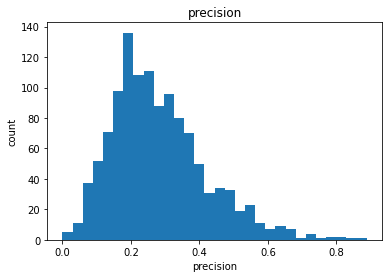

min: 0.0
max: 0.8888888888888888
std: 0.1387371995880537
mean: 0.2819864495271692
median: 0.25961538461538464


In [38]:
analyze_data('precision')

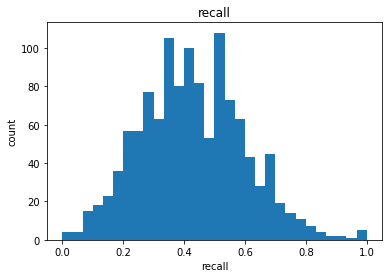

min: 0.0
max: 1.0
std: 0.16960901982019008
mean: 0.42407007515503087
median: 0.4166666666666667


In [39]:
analyze_data('recall')

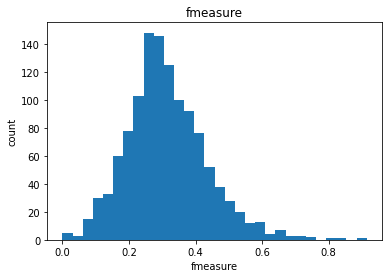

min: 0.0
max: 0.9142857142857143
std: 0.12129762971594003
mean: 0.3133907501891679
median: 0.3


In [40]:
analyze_data('fmeasure')

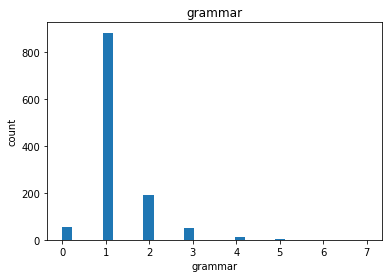

min: 0
max: 7
std: 0.7041145788620008
mean: 1.249374478732277
median: 1.0


In [43]:
analyze_data('grammar')